In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')

In [215]:
data = pd.read_csv('heart.csv')

In [216]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


EDA

In [217]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [218]:
data.shape

(918, 12)

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [220]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [221]:
data.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

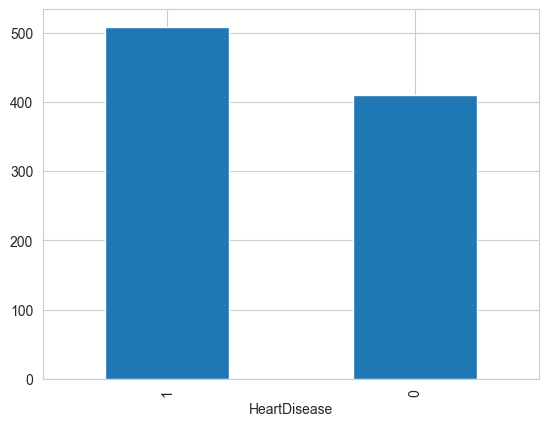

In [222]:
data['HeartDisease'].value_counts().plot(kind='bar')

In [223]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

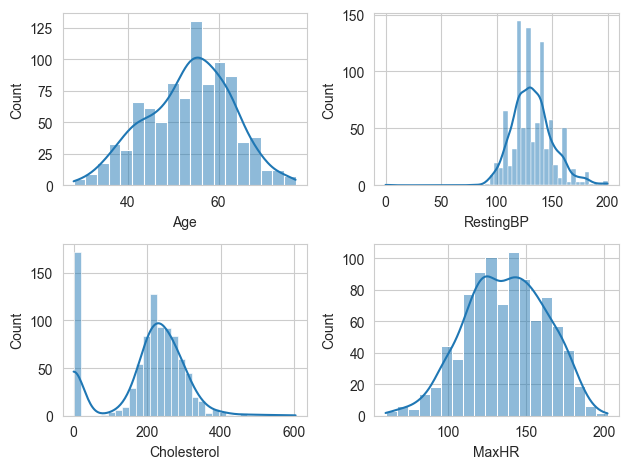

In [224]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(data[var],kde=True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)

plt.tight_layout()

In [225]:
data['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

In [226]:
ch_mean = data.loc[data['Cholesterol'] != 0]['Cholesterol'].mean()
ch_mean

np.float64(244.6353887399464)

In [227]:
data['Cholesterol'] = data['Cholesterol'].replace(0,ch_mean)

In [228]:
data['Cholesterol'] = data['Cholesterol'].round(2)

In [229]:
data['Cholesterol'].value_counts()

Cholesterol
244.64    172
254.00     11
223.00     10
220.00     10
230.00      9
         ... 
392.00      1
316.00      1
153.00      1
466.00      1
131.00      1
Name: count, Length: 222, dtype: int64

In [230]:
resting_bp_mean = data.loc[data['RestingBP'] != 0]['RestingBP'].mean()
data['RestingBP'] = data['RestingBP'].replace(0,resting_bp_mean)
data['RestingBP'] = data['RestingBP'].round(2)

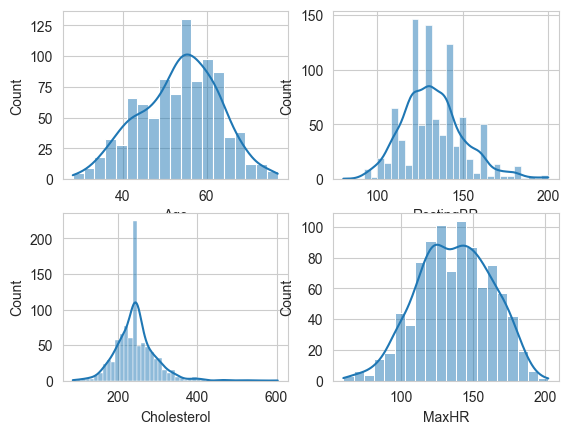

In [231]:
plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)

<Axes: xlabel='Sex', ylabel='count'>

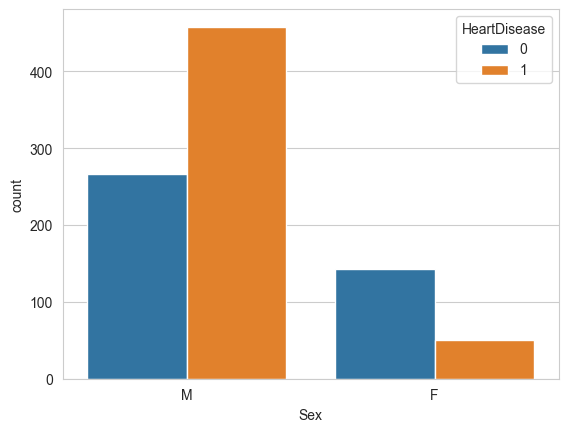

In [232]:
sns.countplot(x = data['Sex'], hue=data['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

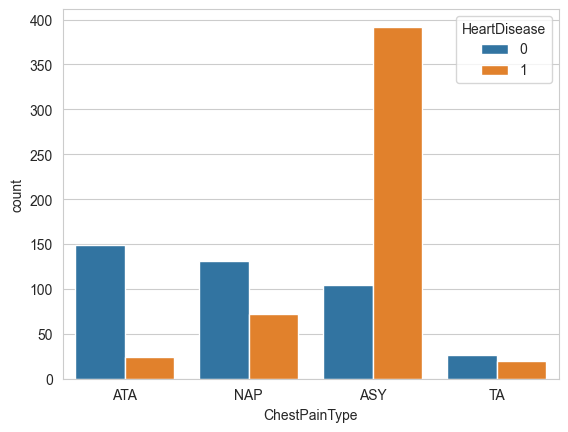

In [233]:
sns.countplot(x = data['ChestPainType'],hue=data['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

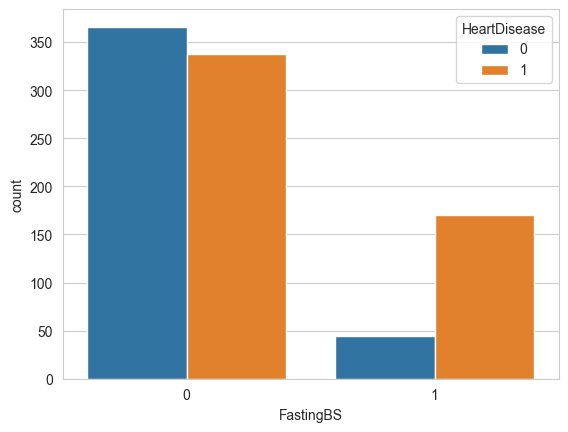

In [234]:
sns.countplot(x = data['FastingBS'],hue=data['HeartDisease'])


<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

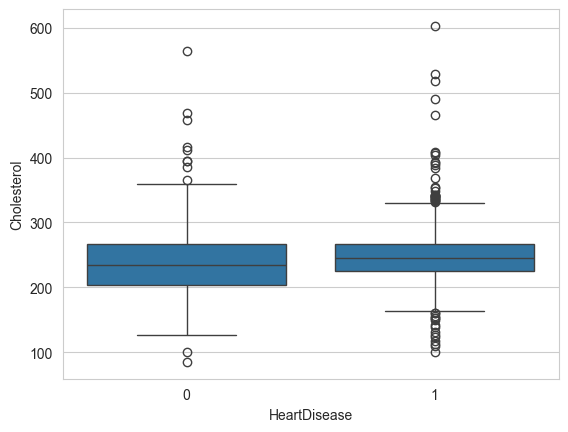

In [235]:
sns.boxplot(x='HeartDisease',y='Cholesterol',data=data)

<Axes: xlabel='HeartDisease', ylabel='Age'>

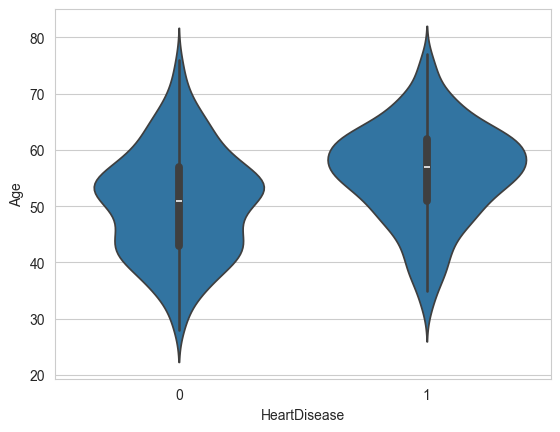

In [236]:
sns.violinplot(x='HeartDisease',y='Age',data=data)


<Axes: >

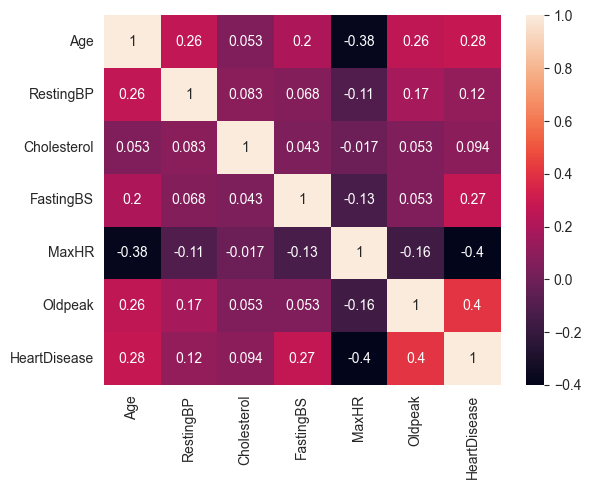

In [237]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

data preprocessing

In [238]:
df_encode = pd.get_dummies(data,drop_first=True)

In [239]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [240]:
df_encode.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [241]:
df_encode = df_encode.astype(int)

In [242]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [243]:
from sklearn.preprocessing import StandardScaler
numeric_columns = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
scaler = StandardScaler()
df_encode[numeric_columns] = scaler.fit_transform(df_encode[numeric_columns])
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


In [244]:
df_encode = df_encode.astype(int)

In [245]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1
1,0,1,-1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,-1,0,0,0,-1,0,0,1,1,0,0,0,1,0,0,1
3,0,0,0,0,-1,0,1,0,0,0,0,1,0,1,1,0
4,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,-1,0,0,0,0,1,1,0,0,1,1,0,0,1,0
914,1,0,0,1,0,2,1,1,0,0,0,1,0,0,1,0
915,0,0,-2,0,0,0,1,1,0,0,0,1,0,1,1,0
916,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [246]:
df_encode.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [248]:
 X = df_encode.drop('HeartDisease',axis=1)
 y = df_encode['HeartDisease']

In [249]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1,0,0,0,1,0,1,1,0,0,1,0,0,0,1
1,0,1,-1,0,0,0,0,0,1,0,1,0,0,1,0
2,-1,0,0,0,-1,0,1,1,0,0,0,1,0,0,1
3,0,0,0,0,-1,0,0,0,0,0,1,0,1,1,0
4,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,-1,0,0,0,0,1,0,0,1,1,0,0,1,0
914,1,0,0,1,0,2,1,0,0,0,1,0,0,1,0
915,0,0,-2,0,0,0,1,0,0,0,1,0,1,1,0
916,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)

In [251]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [252]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM (RBF Kernel)": SVC(probability=True)
}

In [253]:
results = []

In [254]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'F1 Score': round(f1, 4)
    })

In [255]:
results

[{'Model': 'Logistic Regression', 'Accuracy': 0.8478, 'F1 Score': 0.8627},
 {'Model': 'KNN', 'Accuracy': 0.8424, 'F1 Score': 0.8585},
 {'Model': 'Naive Bayes', 'Accuracy': 0.8315, 'F1 Score': 0.8442},
 {'Model': 'Decision Tree', 'Accuracy': 0.7989, 'F1 Score': 0.8195},
 {'Model': 'SVM (RBF Kernel)', 'Accuracy': 0.8424, 'F1 Score': 0.8626}]

In [260]:
import joblib
joblib.dump(models['KNN'],'KNN_heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')

['columns.pkl']